## <center>4. Feladatsor</center>

<img src="toohappy.gif" width="700">

1.feladat.  A spline beépített függvény segítségével az $x=0,\ 1,\ 2.5,\ 3.6,\ 5,\ 7,\ 8.1,\ 10$ osztópontokon készítsük el a $\sin(x)$ függvény spline interpoláltját! Ábrázoljuk egy ábrán a két függvényt és lássuk el őket címkével!

yyy =

  scalar structure containing the fields:

    form = pp
    breaks =

     Columns 1 through 6:

        0.00000    1.00000    2.50000    3.60000    5.00000    7.00000

     Columns 7 and 8:

        8.10000   10.00000

    coefs =

       0.00180  -0.40770   1.24737   0.00000
       0.00180  -0.40229   0.43738   0.84147
       0.20211  -0.39418  -0.75732   0.59847
       0.07146   0.27279  -0.89084  -0.44252
      -0.15778   0.57294   0.29319  -0.95892
       0.00324  -0.37372   0.69162   0.65699
       0.00324  -0.36301  -0.11878   0.96989

    pieces =  7
    order =  4
    dim =  1



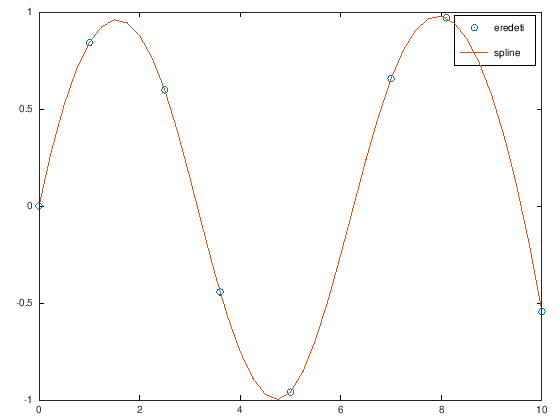

In [3]:
% Beepitett kobos spline 
x = [0 1 2.5 3.6 5 7 8.1 10];
y = sin(x);
xx = 0:.25:10;
yyy = spline(x,y)
yy = spline(x,y,xx);
plot(x,y,'o',xx,yy)
legend('eredeti','spline')

In [2]:
help spline

'spline' is a function from the file /usr/share/octave/4.2.2/m/polynomial/spline.m

 -- PP = spline (X, Y)
 -- YI = spline (X, Y, XI)
     Return the cubic spline interpolant of points X and Y.

     When called with two arguments, return the piecewise polynomial PP
     that may be used with 'ppval' to evaluate the polynomial at
     specific points.

     When called with a third input argument, 'spline' evaluates the
     spline at the points XI.  The third calling form 'spline (X, Y,
     XI)' is equivalent to 'ppval (spline (X, Y), XI)'.

     The variable X must be a vector of length N.

     Y can be either a vector or array.  If Y is a vector it must have a
     length of either N or 'N + 2'.  If the length of Y is N, then the
     "not-a-knot" end condition is used.  If the length of Y is 'N + 2',
     then the first and last values of the vector Y are the values of
     the first derivative of the cubic spline at the endpoints.

     If Y is an array, then the size of Y must 

2.feladat. Adjuk meg a megadott $(t_i, f_i)$ pontokat négyzetesen legjobban közelítõ parabolát a Gauss-féle normál-egyenlet segítségével!

<br>
<table style="width:23%">
  <tr>
    <th>t_i</th>
<td>-2 | -1 | 1 | 2 </td>
  </tr>
  <tr>
    <th>f_i</th>
    <td> 3 | 1 | 0 | 2   </td>
  </tr>
</table>
<br>

Számítsuk ki a maradékvektor euklideszi hosszának négyzetét!<br>

In [4]:
A=[1 -2 4; 1 -1 1; 1 1 1; 1 2 4];
f=[3 1 0 2]';
ATranA=(A'*A);
ATranf=(A'*f);
x=(ATranA)\(ATranf)
J=A*x-f;
Jnorma=norm(J,2)^2

x =

  -0.16667
  -0.30000
   0.66667

Jnorma =  0.10000


3.feladat. Oldjuk meg az előző feladatot beépített függvények segítségével!

In [2]:
t=[-2 -1 1 2];
f=[3 1 0 2];
n=2;
polyfit(t,f,2)
rot90(polyfit(t,f,n)',2)

ans =

   0.66667  -0.30000  -0.16667

ans =

  -0.16667
  -0.30000
   0.66667



4.feladat. Írjuk legkosebbnegyzetek néven olyan programot, amely megadja a megadott $(t_i, f_i)$ pontokat négyzetesen legjobban közelítõ $n$-edfokú polinomot a Gauss-féle normál-egyenlet segítségével és kiszámíja a maradékvektor euklideszi hosszának négyzetét!

In [5]:
[x,Jnorma,MatlabPolyfit]=legkisebbnegyzetek([-2 -1 1 2],[3 1 0 2],2)

x =

  -0.16667
  -0.30000
   0.66667

Jnorma =  0.10000
MatlabPolyfit =

  -0.16667
  -0.30000
   0.66667



5.feladat. Írjunk olyan programot, mely az alábbi 

+ $\displaystyle \frac{f(x_0+h)-f(x_0)}{h}$<br>
+ $\displaystyle \frac{f(x_0+h)-f(x_0-h)}{2h}$<br>
+ $\displaystyle \frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}$<br>

véges differenciahányadokosat kiszámolja adott függvényre, adott pontban és adott lépésközzel. Eredményeinket vessük össze a megfelelő derivált értékekkel!

In [4]:
[elso, elsoketto, masodik] = derivalt(@(x)(sin(x)),0.4,0.1)


elso =  0.90007
elsoketto =  0.91953
masodik = -0.38909
ans =  0.92106
ans = -0.38942


ans =

   2  -1   0   0   0   0
  -1   2  -1   0   0   0
   0  -1   2  -1   0   0
   0   0  -1   2  -1   0
   0   0   0  -1   2  -1
   0   0   0   0  -1   2



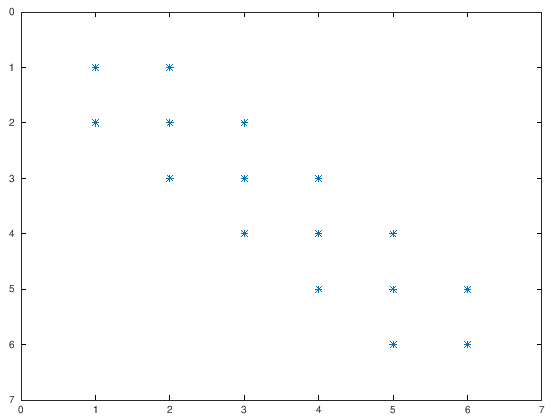

In [4]:
% spdiags parancs hasznalata
n=6;
e=ones(n,1);
A=spdiags([-e 2*e -e], [-1, 0, 1], n,n);
full(A)
spy(A);